# Taller 9
## Datos climáticos

# Práctica para leer, presentar y analizar archivos de Precipitación y Temperatura

En la clase, vamos a trabajar con datos de libre acceso encontrados en *sciencedatabase.gov* con el fin de aprender a leer archivos planos con información geocientífica. 

Referencia de los datos:
Kam, Jonghun, Milly, P.C.D., and Dunne, K.A., 2018, Monthly Time Series of Precipitation, Air Temperature, and Net Radiation for 2,673 Gaged River Basins Worldwide: U.S. Geological Survey data release, https://doi.org/10.5066/F7SJ1JVG.

En el folder `data/`, hay 2 archivos con datos: `MON_P_CRU_19012015.csv` y `MON_T_CRU_19012015.csv`, que representan para cada una de las estaciones la Precipitación y la Temperatura respectivamente. Note que cada *estación* esta organizada por filas, cada columna representa un mes del año.  

Adicionalmente hay un archivo con la ubicación de cada estación `BASIN_CHARACTERISTICS.csv`, donde se encuentra la latitud y longitud de cada estación. 

Fuente: https://www.sciencebase.gov/catalog/item/5a58af4fe4b00b291cd6a5fb

## Tarea en Clase

- Leer el archivo de lat/lon de cada estación.
- Leer los datos de precipitación y temperatura. 
- Con los códigos de figuras, hacer el mapa de estaciones.
- Con los códigos de figuras, graficar la precipitación y temperatura de una estación
- Calcule el PSD para varias señales, presente y discuta los resultados. 

In [2]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller9/data
! pwd

Drive already mounted at /content/Mdrive; to attempt to forcibly remount, call drive.mount("/content/Mdrive", force_remount=True).
/content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller9/data
/content/Mdrive/MyDrive/mgual/Geoinfo/Trabajos/taller9/data


In [3]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')

  Using cached Shapely-1.8.0.tar.gz (278 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uninstalled Shapely-1.8.0
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [45]:
#Imports:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cio
import matplotlib.colors as cm #Cargar las escalas de colores
import matplotlib.pyplot as plt
import numpy as np

# Funciones de lectura de archivos

In [46]:
def read_TP():
    """
    Leer datos de T/P, y posición de estaciones
    """
    
    import numpy as np
    import pandas as pd

    # Nombres de archivos
    Tfile    = 'MON_T_CRU_19012015.csv'
    Pfile    = 'MON_P_CRU_19012015.csv'
    sta_file = 'BASIN_CHARACTERISTICS.csv'

    # Read data files
    basin = pd.read_csv(sta_file,header=0)
    Temp  = pd.read_csv(Tfile,   header=0)
    Prec  = pd.read_csv(Pfile,   header=0)

    # Organize files
    T   = Temp.iloc[:,1:].to_numpy()
    P   = Prec.iloc[:,1:].to_numpy()

    sta   = basin['station id'].to_numpy()
    lon   = basin.iloc[:,1].to_numpy()
    lat   = np.array(basin['lat'])
    area  = np.array(basin['area'])
    elev  = np.array(basin['elev'])
    
    return T,P

def read_sta():
    """
    Leer datos de T/P, y posición de estaciones
    """
    
    import numpy as np
    import pandas as pd

    # Nombres de archivos
    sta_file = 'BASIN_CHARACTERISTICS.csv'

    # Read data files
    basin = pd.read_csv(sta_file,header=0)

    # Organize files
    sta   = basin['station id'].to_numpy()
    lon   = basin.iloc[:,1].to_numpy()
    lat   = np.array(basin['lat'])
    area  = np.array(basin['area'])
    elev  = np.array(basin['elev'])
    
    return sta,lat,lon

# Cargar los datos


In [47]:
t,p = read_TP()
sta,lat,lon = read_sta()

# Graficar los mapas

### Mapa de Estaciones

La estación cuyos datos son graficados a continuación, corresponde a la 1570


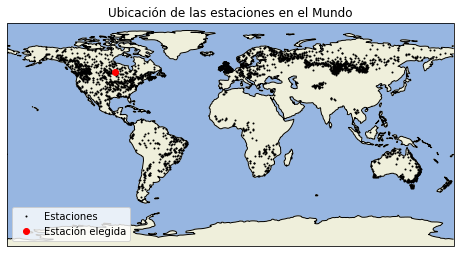

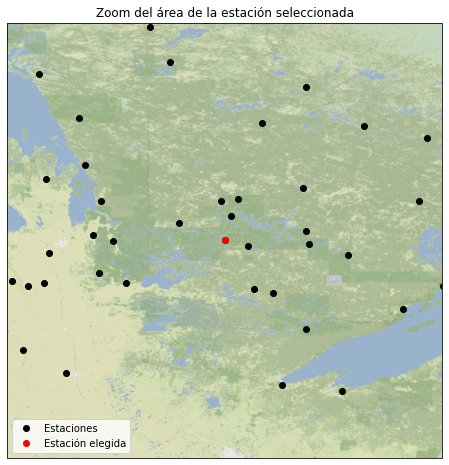

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import cartopy.crs as ccrs
import cartopy.io.img_tiles as tiles
import cartopy.feature as cfeature


num_sta= 1570
print("La estación cuyos datos son graficados a continuación, corresponde a la",num_sta)

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
ax.set_title('Ubicación de las estaciones en el Mundo')
ax.coastlines()
ax.plot(lon,lat,'ko',label='Estaciones',markersize=1.0)
ax.plot(lon[num_sta],lat[num_sta],'ro',label='Estación elegida')  #Con esto diferenciamos en el mapa la estación escogida.
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.legend()


tiler = tiles.Stamen('terrain-background') #Descargamos el relieve aledaño a la estación seleccionada.

fig = plt.figure(figsize=(8,8))
ax  = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([lon[num_sta]-5, lon[num_sta]+5, lat[num_sta]-5, lat[num_sta]+5])
ax.set_title('Zoom del área de la estación seleccionada')
ax.add_image(tiler, 10)
ax.coastlines(color='black',resolution='10m')
ax.plot(lon,lat,'ko',label='Estaciones')
ax.plot(lon[num_sta],lat[num_sta],'ro',label='Estación elegida')
ax.legend()
plt.show()

#**Gráficas de Precipitación y de Temperatura**

Text(0.5, 0, 'Datos')

<Figure size 432x288 with 0 Axes>

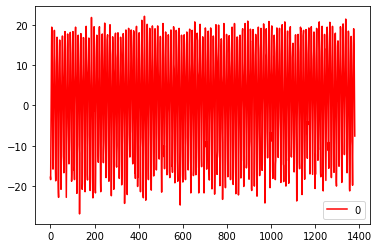

<Figure size 432x288 with 0 Axes>

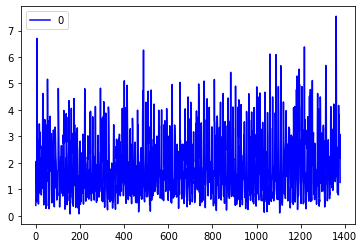

In [49]:
T_sta=(t[num_sta])
P_sta=(p[num_sta])

fig = plt.figure()
dfT = pd.DataFrame(T_sta)
dfT.plot(color="red")
ax.yaxis.tick_left()
#fig.suptitle(num_sta)
ax.set_ylabel("Temperatura Promedio (°C)")
ax.set_xlabel("Datos")


fig = plt.figure()
dfP = pd.DataFrame(P_sta)
dfP.plot(color="blue")
#fig.suptitle(num_sta)
ax.set_ylabel("Precipitacion Promedio (mm)")
ax.set_xlabel("Datos")

#**Análisis de Fourier**

[[2355.3776      -0.j        ]
 [  62.85219551+282.18809753j]
 [-110.7997319 +308.70609645j]
 ...
 [ -16.49691596-109.92401188j]
 [-110.7997319 -308.70609645j]
 [  62.85219551-282.18809753j]]

[[2567.5536     -0.j        ]
 [  35.27659375+82.09102443j]
 [  55.04737651+44.87520224j]
 ...
 [  28.46739427-30.80918226j]
 [  55.04737651-44.87520224j]
 [  35.27659375-82.09102443j]]


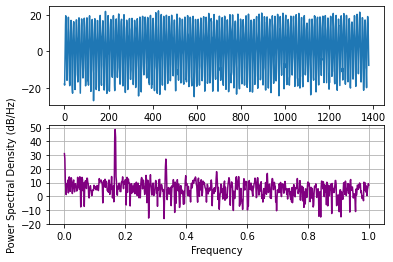

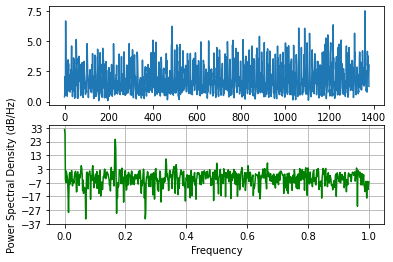

In [50]:
#imports

import scipy
import scipy.signal as signal
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec

#Vectores

tempera = np.array(dfT)
precipi = np.array(dfP)
vtemp = (np.asarray(tempera)).flatten()
vpreci = (np.asarray(precipi)).flatten()


#Transformada

ftempera = scipy.fft.fft(tempera,axis=0)
fprecipi = scipy.fft.fft(precipi,axis=0)
print(ftempera)
print('')
print(fprecipi)

#Valores:

dt = 1
t = np.arange(0, 1380, dt)
s = vtemp
d = vpreci

#Gráfica Temperatura:
plt.subplot(211)
plt.plot(t, s)
plt.subplot(212)
plt.psd(s, 1380,color='purple')
ax.set_title("Transformada de Fourier para la Temperatura de la estación.")
plt.show()

#Gráfica Precipitación:
plt.subplot(211)
plt.plot(t, vpreci)
plt.subplot(212)
plt.psd(d, 1380,color='green')
plt.show()

In [51]:
print('Fin del último taller <:°)')

Fin del último taller <:°)
